In [9]:
##importing required libraries
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import random 
import kaggle
import zipfile

If importing kaggle is giving you auth error most probably you havent added the api from kaggle
To do so:
- Login to kaggle
- Profile -> Settings -> API -> create Token
- A json file will be downloaded now paste it to your root directory/.kaggle eg: C/Users/arati/.kaggle

In [35]:
#Downloading Data
# Set the Kaggle dataset and file details
kaggle_dataset = 'deadskull7/fer2013'  # Example: 'zillow/zecon'
file_name = 'fer2013.csv'  # Name of the file you want to download
data_folder = '../data'

# Create data directory if it does not exist
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

try:
    # Download the dataset file from Kaggle
    kaggle.api.dataset_download_file(dataset=kaggle_dataset, file_name=file_name, path=data_folder)
    # Define the path to the downloaded zip file
    zip_file_path = os.path.join(data_folder, file_name+'.zip')
    
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(data_folder)

    # Remove the zip file after extraction
    os.remove(zip_file_path)
    print('Data downloaded and extracted.')

except Exception as e:
    print(f"An error occurred: {e}")


Dataset URL: https://www.kaggle.com/datasets/deadskull7/fer2013
Data downloaded and extracted


In [37]:
##import the dataset
faces = pd.read_csv('../data/fer2013.csv')
faces.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [38]:
faces.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [39]:
faces.nunique()


emotion        7
pixels     34034
Usage          3
dtype: int64

## Dataset Description
The given dataset has 3 features which are:
- Emotion: Label encoded feature with 7 different emotions.
    - 0: Angry
    - 1: Digust
    - 2: Fear
    - 3: Happy
    - 4: Sad
    - 5: Surprise
    - 6: Neutral 
- Pixels: This is a flattened array of pixels of a black and white 48x48 pixels face picture in string format
- Usage: Label for the picture whether to use them as training or testing or validation


In [40]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = faces['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Digust,547


It seems the data is not balanced properly as some classes like disgust is way sparse than the class happy. WE can use some augmentation techniques to handle the imbalance or even SMOTE during training

In [41]:
##Lets check some of the faces
faces.sample(n=10)

,emotion,pixels,Usage
35396,0,82 59 57 73 73 88 114 128 171 180 184 188 188 ...,PrivateTest
30513,5,118 122 125 134 141 146 152 159 165 171 173 17...,PublicTest
34285,2,255 255 255 255 255 255 255 255 252 255 242 11...,PrivateTest
19177,5,255 255 255 255 255 255 255 255 254 253 255 23...,Training
24300,5,107 90 84 87 96 104 101 105 100 103 111 105 11...,Training
23817,4,226 228 231 228 211 206 216 218 206 198 209 21...,Training
6085,4,253 182 112 88 49 65 109 140 168 185 197 203 2...,Training
34660,2,86 79 83 104 126 132 141 153 173 186 197 213 2...,PrivateTest
5994,4,1 6 12 24 35 40 44 51 64 65 65 63 66 67 69 70 ...,Training
23356,6,68 73 41 26 35 74 92 100 90 21 16 30 66 73 76 ...,Training


In [42]:
#Lets create a funtion to convert the pixel values to array so that we can plot it
type(faces['pixels'][0])

str

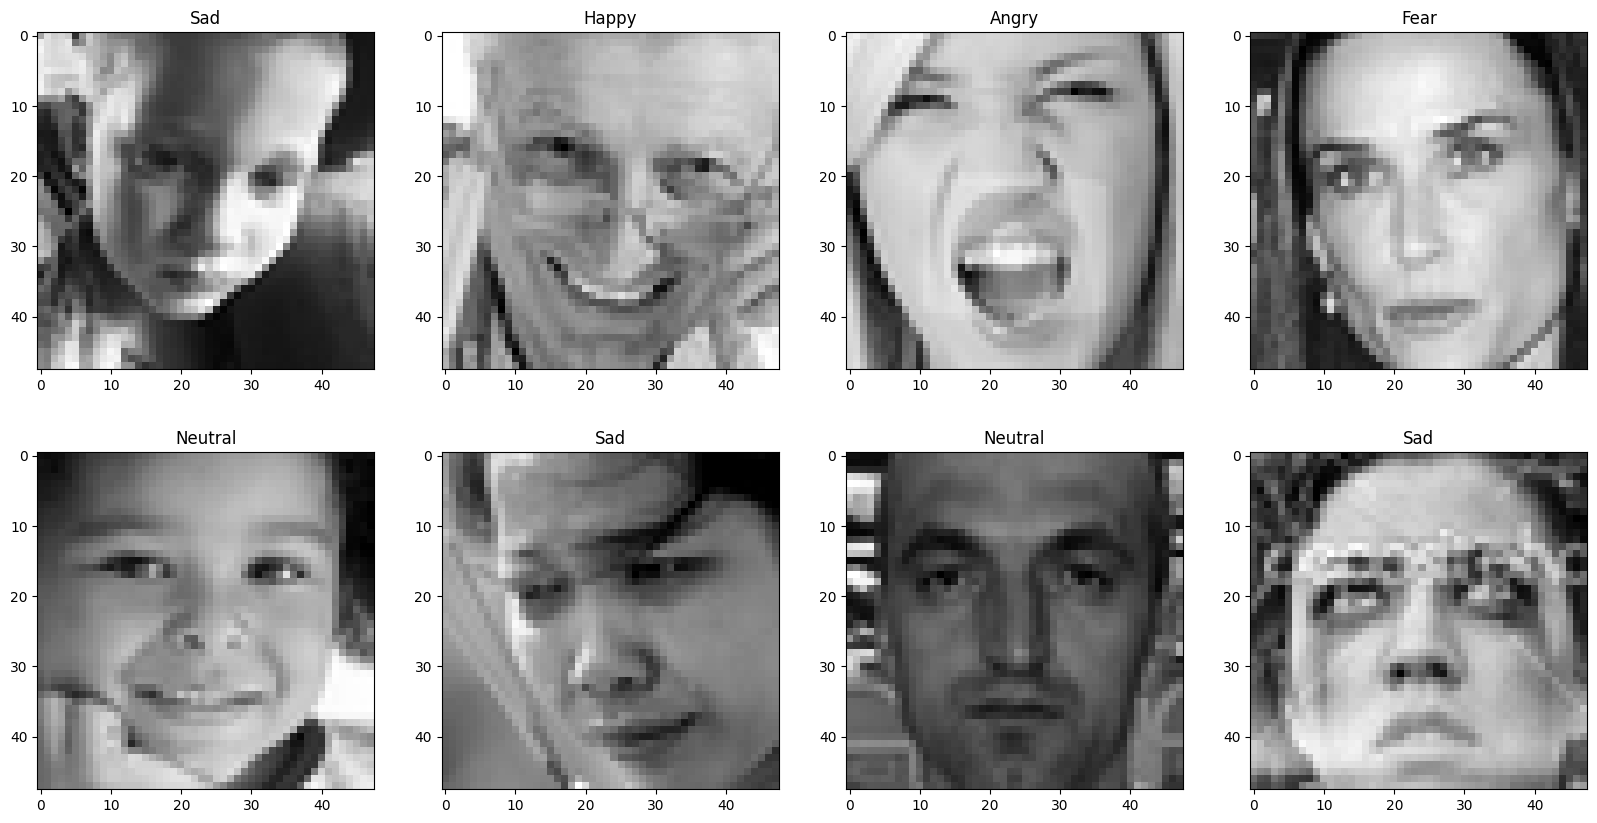

In [44]:
def get_image(row):
    pixels = row['pixels']
    emotion = emotion_map[row['emotion']]
    img = np.array(pixels.split(),dtype =float) 
    #this will give a list from the string for instance [233,181,135]. 
    #pixels.split gives a list and np.array converts the list to array
    img = img.reshape(48,48) # reshape the 1d array to 2d array of dimensions 48x48
    return (img.astype(np.uint8), emotion) #return tuple of img with required datatype and emotion label

samples = faces.sample(n = 8).reset_index() #getting 8 random
plt.figure(0, figsize=(20,10))
for index, row in samples.iterrows():
    img = get_image(row)
    plt.subplot(2,4,index+1)
    plt.imshow(img[0],cmap='gray')
    plt.title(img[1])

plt.show()  